In [1]:
from sympy import *; init_session()

IPython console for SymPy 0.7.7.dev (Python 2.7.10-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/dev


In [2]:
from applpy import *; import numpy as np

In [3]:
'''
X = MarkovChain([[.3,.3,.4,0,0],
                 [0,.3,.3,.4,0],
                 [0,0,.3,.3,.4],
                 [.3,.3,.4,0,0],
                 [.3,.3,.4,0,0]])
'''

X = MarkovChain([[Rational(3,10),Rational(3,10),Rational(4,10),0,0],
                 [0,Rational(3,10),Rational(3,10),Rational(4,10),0],
                 [0,0,Rational(3,10),Rational(3,10),Rational(4,10)],
                 [Rational(3,10),Rational(3,10),Rational(4,10),0,0],
                 [Rational(3,10),Rational(3,10),Rational(4,10),0,0]],
               states = ['blue','green','black', 'yellow','orange'])


In [4]:
X.display()

The transition probability matrix:
      0     1     2     3    4
0  3/10  3/10   2/5     0    0
1     0  3/10  3/10   2/5    0
2     0     0  3/10  3/10  2/5
3  3/10  3/10   2/5     0    0
4  3/10  3/10   2/5     0    0
----------------------------------------
The initial system state:
None


In [5]:
X.display(n=3,method = 'rational')

The transition probability matrix after 3 steps:
          0         1         2         3       4
0  147/1000  201/1000  349/1000  171/1000  33/250
1    27/200    99/500    69/200    93/500  17/125
2    63/500  189/1000   171/500    39/200  37/250
3  147/1000  201/1000  349/1000  171/1000  33/250
4  147/1000  201/1000  349/1000  171/1000  33/250
----------------------------------------
The initial system state:
None


In [8]:
X.display(option='steady state',method='rational')

The steady state probabilities are:
       Prob
0  147/1070
1    21/107
2    37/107
3    39/214
4    74/535


In [6]:
Pi = X.long_run_probs()
matrix_display(Pi, X.state_space)

,0,1,2,3,4
0,0.137383,0.196262,0.345794,0.182243,0.138318
1,0.137383,0.196262,0.345794,0.182243,0.138318
2,0.137383,0.196262,0.345794,0.182243,0.138318
3,0.137383,0.196262,0.345794,0.182243,0.138318
4,0.137383,0.196262,0.345794,0.182243,0.138318


In [7]:
Y = MarkovChain(P=[[.97,.03],[.04,.96]],init=[.7,.3],states=['red','blue'])

In [8]:
Y.display()

The transition probability matrix:
       red  blue
red   0.97  0.03
blue  0.04  0.96
----------------------------------------
The initial system state:
      Prob
red    0.7
blue   0.3


In [9]:
Y.probability([(2,'blue'),(1,'red'),(0,'red')])

In [10]:
Y.probability([(1,'blue')])

In [11]:
Y.probability([(2,'blue')],given=[(1,'blue')])

In [20]:
# DTMC with rationals 

In [8]:
trans_mat = X.P; size = np.size(trans_mat,axis=0)

In [23]:
a = symbols('a0:%d'%(size),positive=True)

In [22]:
size

In [43]:
eqns = []
norm_eqn = -1
for i in range(1,size):
    current_eqn = 0
    for j in range(size):
        current_eqn += trans_mat[j][i]*a[j]
    current_eqn -= a[i]
    norm_eqn += a[i]
    eqns.append(current_eqn)
eqns.append(norm_eqn+a[0])

In [58]:
solns = solve(eqns)

In [46]:
X.display(option='steady state')

The steady state probabilities are:
          0
0  0.137383
1  0.196262
2  0.345794
3  0.182243
4  0.138318


In [26]:
trans_mat

array([[3/10, 3/10, 2/5, 0, 0],
       [0, 3/10, 3/10, 2/5, 0],
       [0, 0, 3/10, 3/10, 2/5],
       [3/10, 3/10, 2/5, 0, 0],
       [3/10, 3/10, 2/5, 0, 0]], dtype=object)

In [62]:
soln = [solns[a[i]] for i in range(size)]

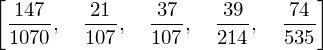

In [63]:
soln

In [10]:
np.dot(trans_mat,trans_mat)

array([[9/100, 9/50, 33/100, 6/25, 4/25],
       [3/25, 21/100, 17/50, 21/100, 3/25],
       [21/100, 21/100, 37/100, 9/100, 3/25],
       [9/100, 9/50, 33/100, 6/25, 4/25],
       [9/100, 9/50, 33/100, 6/25, 4/25]], dtype=object)

In [17]:
Y.init_print['Prob']

red     0.7
blue    0.3
Name: Prob, dtype: float64